In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
ticker = 'AAPL'
data = yf.download(ticker, start = "2020-01-01", end="2025-12-01")
data.head()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_16884\988124764.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = "2020-01-01", end="2025-12-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [4]:
# Moving average:
data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()

#RSI
delta = data['Close'].diff()
gain = delta.clip(lower = 0)
loss = -delta.clip(upper = 0)

window  = 14

avg_gain = gain.ewm(alpha=1/window, adjust = False).mean()
avg_loss = loss.ewm(alpha=1/window, adjust= False).mean()

rs = avg_gain/avg_loss
data['RSI'] = 100 - (100/ (1+rs))
data

Price,Close,High,Low,Open,Volume,MA20,MA50,RSI
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400,NaN,NaN,NaN
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,NaN,NaN,0.000000
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200,NaN,NaN,5.876440
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000,NaN,NaN,5.663228
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200,NaN,NaN,16.738766
...,...,...,...,...,...,...,...,...
2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800,269.942412,259.289082,59.852250
2025-11-24,275.920013,277.000000,270.899994,270.899994,65585800,270.310930,260.078067,65.170242


In [5]:
data['volatility'] = data['Close'].pct_change().rolling(20).std()
data['momentum'] = data['Close'] - data['Close'].shift(5)
data['volume_burst'] = data['Volume']/data['Volume'].rolling(20).mean()
data

Price,Close,High,Low,Open,Volume,MA20,MA50,RSI,volatility,momentum,volume_burst
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,NaN,NaN,0.000000,NaN,NaN,NaN
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200,NaN,NaN,5.876440,NaN,NaN,NaN
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000,NaN,NaN,5.663228,NaN,NaN,NaN
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200,NaN,NaN,16.738766,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800,269.942412,259.289082,59.852250,0.010078,-0.920013,1.174655
2025-11-24,275.920013,277.000000,270.899994,270.899994,65585800,270.310930,260.078067,65.170242,0.009451,8.460022,1.278760


In [6]:
data['return'] = data['Close'].pct_change().shift(-1)
data.dropna()

Price,Close,High,Low,Open,Volume,MA20,MA50,RSI,volatility,momentum,volume_burst,return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2020-03-13,67.227577,67.699191,61.176441,64.064157,370732000,70.773997,73.870377,44.954340,0.055299,-2.674911,1.523944,-0.128647
2020-03-16,58.578976,62.659014,58.044481,58.516092,322423600,69.773455,73.592591,36.656278,0.061639,-5.794781,1.262491,0.043970
2020-03-17,61.154694,62.303487,57.657512,59.860784,324056000,68.973650,73.380410,40.196794,0.062905,-7.855362,1.227656,-0.024480
2020-03-18,59.657631,60.462999,57.347944,57.988854,300233600,68.043125,73.126852,38.838022,0.062721,-6.955666,1.094642,-0.007662
2020-03-19,59.200535,61.149861,58.675716,59.831769,271857200,67.129892,72.870955,38.411085,0.062726,-0.834389,0.961169,-0.063485
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-20,266.250000,275.429993,265.920013,270.829987,45823600,269.496187,258.536149,51.762799,0.009516,-6.700012,0.931093,0.019681
2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800,269.942412,259.289082,59.852250,0.010078,-0.920013,1.174655,0.016317


In [7]:
data = data.dropna()

features = ['MA20',	'MA50',	'RSI',	'volatility',	'momentum',	'volume_burst']
x = data[features]
y = data['return']


model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
#.tail(1) means: “Give me the very last row. [0] The model returns its predictions inside an array like:
prediction = model.predict(x_tail(-1))[0] #I used prediction = model.predict(x_tail(-1))[0]
print ("Predicted return for next day:", prediction)

#array([0.0034])
#Which means 0.34% expected return tomorrow.



NameError: name 'x_tail' is not defined

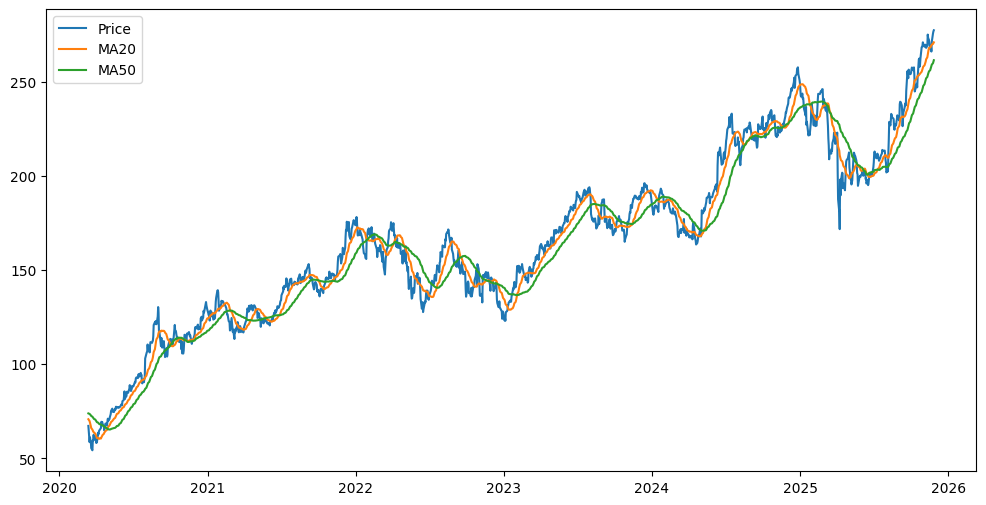

In [24]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Price')
plt.plot(data['MA20'], label='MA20')
plt.plot(data['MA50'], label='MA50')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

from sklearn.metrics import r2_score
r2_score(y_test,prediction) 

0.0003913550470059368

In [32]:
model2 = RandomForestRegressor(n_estimators=300, random_state=0)
model2.fit(x_train,y_train)
prediction2 = model2.predict(x_test)
r2_score(y_test,prediction2)

-0.10267686014004451